In [36]:
! pip install kaggle

In [37]:
! mkdir ~/.kaggle

In [38]:
! cp kaggle.json ~/.kaggle/

In [39]:
! chmod 600 ~/.kaggle/kaggle.json

In [40]:
! kaggle datasets download adacslicml/breast-histopathology-images

 99% 158M/159M [00:01<00:00, 133MB/s]
100% 159M/159M [00:01<00:00, 124MB/s]


In [41]:
! unzip breast-histopathology-images

Streaming output truncated to the last 5000 lines.
  inflating: BreastCancer/train/1_Cancer/9077_idx5_x1701_y1351_class1.png  
  inflating: BreastCancer/train/1_Cancer/9077_idx5_x1751_y1451_class1.png  
  inflating: BreastCancer/train/1_Cancer/9077_idx5_x1751_y1851_class1.png  
  inflating: BreastCancer/train/1_Cancer/9077_idx5_x1751_y2101_class1.png  
  inflating: BreastCancer/train/1_Cancer/9077_idx5_x1751_y501_class1.png  
  inflating: BreastCancer/train/1_Cancer/9077_idx5_x1801_y1801_class1.png  
  inflating: BreastCancer/train/1_Cancer/9077_idx5_x1801_y1901_class1.png  
  inflating: BreastCancer/train/1_Cancer/9077_idx5_x1851_y2001_class1.png  
  inflating: BreastCancer/train/1_Cancer/9077_idx5_x1851_y2051_class1.png  
  inflating: BreastCancer/train/1_Cancer/9077_idx5_x1851_y601_class1.png  
  inflating: BreastCancer/train/1_Cancer/9077_idx5_x1851_y851_class1.png  
  inflating: BreastCancer/train/1_Cancer/9077_idx5_x1901_y1001_class1.png  
  inflating: BreastCancer/train/1_Cancer

Sample Data

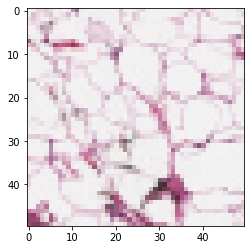

In [42]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('BreastCancer/train/0_NoCancer/9383_idx5_x951_y1901_class0.png')
imgplot = plt.imshow(img)
plt.show()

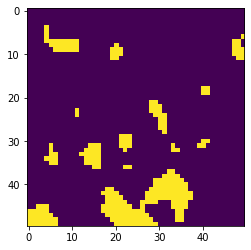

In [43]:
import cv2
img = cv2.imread('BreastCancer/train/0_NoCancer/9383_idx5_x951_y1901_class0.png',0)
img = cv2.GaussianBlur(img, (5, 5), 0)
ret, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
imgplot = plt.imshow(img)
plt.show()

Load dataset and Extract Features using VGG19

In [44]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
model = VGG19(weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 0s 0us/step


In [46]:
import numpy as np
import cv2
import os
from scipy import ndimage
from scipy.spatial import distance
from sklearn.cluster import KMeans
from google.colab.patches import cv2_imshow


# Return a dictionary that holds all images category by category. 
def load_images_from_folder(folder):
    img_path = '/content/BreastCancer/train/0_NoCancer/10253_idx5_x1001_y1001_class0.png'
    img = image.load_img(img_path, target_size = (50,50))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
#x = preprocess_inputs(x)

    f = model.predict(x)
    print(f.shape)
    images = {}
    #features = []
    ct = 0
    for filename in os.listdir(folder):
        category = []
        path = folder + "/" + filename
        for cat in os.listdir(path)[:500]:
          ct += 1
          img = cv2.imread(path + "/" + cat,0)
          img = cv2.GaussianBlur(img, (5, 5), 0)
          ret, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
          if img is not None:
            name = folder.split('/')[-1]
            #print(str(filename))
            pt = str('/content/BreastCancer/' + name + '/' + filename + '/'+ cat)
            print(pt)
            #cv2.imwrite(pt, img)
            img = image.load_img(pt, target_size = (50,50))
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)
            ft = model.predict(x)
            f = np.vstack([f,ft])
            print(f.shape)
            #category.append(img)
          #images[filename] = category
    #cv2_imshow(img)
    #print('image ->' + cat)
    print(ct)
    return f


features_train = load_images_from_folder('BreastCancer/train')

(1, 1, 1, 512)
/content/BreastCancer/train/0_NoCancer/14304_idx5_x1351_y2101_class0.png
(2, 1, 1, 512)
/content/BreastCancer/train/0_NoCancer/9257_idx5_x1101_y651_class0.png
(3, 1, 1, 512)
/content/BreastCancer/train/0_NoCancer/8863_idx5_x1551_y451_class0.png
(4, 1, 1, 512)
/content/BreastCancer/train/0_NoCancer/10269_idx5_x1301_y1001_class0.png
(5, 1, 1, 512)
/content/BreastCancer/train/0_NoCancer/12867_idx5_x1501_y2001_class0.png
(6, 1, 1, 512)
/content/BreastCancer/train/0_NoCancer/9075_idx5_x2151_y1451_class0.png
(7, 1, 1, 512)
/content/BreastCancer/train/0_NoCancer/10305_idx5_x2301_y751_class0.png
(8, 1, 1, 512)
/content/BreastCancer/train/0_NoCancer/12895_idx5_x2651_y1351_class0.png
(9, 1, 1, 512)
/content/BreastCancer/train/0_NoCancer/16569_idx5_x551_y101_class0.png
(10, 1, 1, 512)
/content/BreastCancer/train/0_NoCancer/9123_idx5_x2001_y1101_class0.png
(11, 1, 1, 512)
/content/BreastCancer/train/0_NoCancer/13404_idx5_x1401_y1951_class0.png
(12, 1, 1, 512)
/content/BreastCancer/t

In [47]:
import numpy as np
import cv2
import os
from scipy import ndimage
from scipy.spatial import distance
from sklearn.cluster import KMeans
from google.colab.patches import cv2_imshow


# Return a dictionary that holds all images category by category. 
def load_images_from_folder(folder):
    img_path = '/content/BreastCancer/test/0_NoCancer/10253_idx5_x1101_y401_class0.png'
    img = image.load_img(img_path, target_size = (50,50))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
#x = preprocess_inputs(x)

    f = model.predict(x)
    print(f.shape)
    images = {}
    #features = []
    ct = 0
    for filename in os.listdir(folder):
        category = []
        path = folder + "/" + filename
        for cat in os.listdir(path)[:300]:
          ct += 1
          img = cv2.imread(path + "/" + cat,0)
          img = cv2.GaussianBlur(img, (5, 5), 0)
          ret, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
          if img is not None:
            name = folder.split('/')[-1]
            #print(str(filename))
            pt = str('/content/BreastCancer/' + name + '/' + filename + '/'+ cat)
            print(pt)
            #cv2.imwrite(pt, img)
            img = image.load_img(pt, target_size = (50,50))
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)
            ft = model.predict(x)
            f = np.vstack([f,ft])
            print(f.shape)
            #category.append(img)
          #images[filename] = category
    #cv2_imshow(img)
    #print('image ->' + cat)
    print(ct)
    return f


features_test = load_images_from_folder('BreastCancer/test')

(1, 1, 1, 512)
/content/BreastCancer/test/0_NoCancer/10308_idx5_x1251_y2451_class0.png
(2, 1, 1, 512)
/content/BreastCancer/test/0_NoCancer/16085_idx5_x1901_y1751_class0.png
(3, 1, 1, 512)
/content/BreastCancer/test/0_NoCancer/12954_idx5_x2551_y751_class0.png
(4, 1, 1, 512)
/content/BreastCancer/test/0_NoCancer/12897_idx5_x2751_y1451_class0.png
(5, 1, 1, 512)
/content/BreastCancer/test/0_NoCancer/9123_idx5_x1451_y1101_class0.png
(6, 1, 1, 512)
/content/BreastCancer/test/0_NoCancer/12884_idx5_x1001_y1151_class0.png
(7, 1, 1, 512)
/content/BreastCancer/test/0_NoCancer/8867_idx5_x1801_y751_class0.png
(8, 1, 1, 512)
/content/BreastCancer/test/0_NoCancer/16014_idx5_x1851_y901_class0.png
(9, 1, 1, 512)
/content/BreastCancer/test/0_NoCancer/9029_idx5_x2151_y501_class0.png
(10, 1, 1, 512)
/content/BreastCancer/test/0_NoCancer/16551_idx5_x1951_y1401_class0.png
(11, 1, 1, 512)
/content/BreastCancer/test/0_NoCancer/13022_idx5_x1701_y101_class0.png
(12, 1, 1, 512)
/content/BreastCancer/test/0_NoCa

In [ ]:
features_train

In [48]:
new_train_ft = np.array(features_train[0][0][0])
new_train_ft.shape

for i in features_train[1:]:
  new_train_ft = np.vstack([new_train_ft,i[0][0]])

new_train_ft.shape

(1001, 512)

In [49]:
new_test_ft = np.array(features_test[0][0][0])
new_test_ft.shape

for i in features_test[1:]:
  new_test_ft = np.vstack([new_test_ft,i[0][0]])

new_test_ft.shape

(601, 512)

Building the visual dictionary using Kmeans clustering

In [50]:
def k_means(dataset,num_clusters,max_iter,n_runs):
  '''
  k-means clustering
  The number of clusters to form as well as the number of centroids to generate.
  num_clusters = 50
  Maximum number of iterations of the k-means algorithm for a single run.
  max_iter = 500
  Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive.
  n_runs = 20
  '''
  from sklearn.cluster import KMeans
  kmeans = KMeans(
      n_clusters=num_clusters, init='random',
      n_init=n_runs, max_iter=max_iter, 
      tol=1e-04, random_state=0
  )

  y_pred_km = kmeans.fit_predict(dataset)
  distortion = kmeans.inertia_
  centroids = kmeans.cluster_centers_

  return y_pred_km,centroids,distortion

In [59]:
num_clusters = 800
max_iter = 500
n_runs = 20  
train_pred,train_centroids,train_distortion = k_means(new_train_ft,num_clusters,max_iter,n_runs)
print("distortion:",train_distortion)
#print(train_centroids.shape)

distortion: 2816088.25


In [60]:
train_centroids.shape

(800, 512)

In [62]:
n = 0
train_dict = {}
NoCan = []
Can = []
for i in new_train_ft:
  n += 1
  if(n<=280):
    NoCan.append(i)
  else:
    Can.append(i)
train_dict['0_NoCancer'] = NoCan
train_dict['1_Cancer'] = Can

In [63]:
n = 0
test_dict = {}
NoCan = []
Can = []
for i in new_test_ft:
  n += 1
  if(n<=280):
    NoCan.append(i)
  else:
    Can.append(i)
test_dict['0_NoCancer'] = NoCan
test_dict['1_Cancer'] = Can

Histogram generation 

In [75]:
def find_index(image, center):
    count = 0
    ind = 0
    for i in range(len(center)):
        if(i == 0):
           count = distance.euclidean(image, center[i]) 
           #count = L1_dist(image, center[i])
        else:
            dist = distance.euclidean(image, center[i]) 
            #dist = L1_dist(image, center[i])
            if(dist < count):
                ind = i
                count = dist
    return ind

def image_class(all_bovw, centers):
    dict_feature = np.array([np.zeros(len(centers))])
    for key,value in all_bovw.items():
        category = []
        print(key)
        ct=0
        for img in value:
            ct+=1
            print(key + '--->'+ str(ct))
            histogram = np.zeros(len(centers))
            nooo = 0
            for each_feature in img:
                nooo+=1
                print(key + '--->'+ str(ct) + '--->' + str(nooo))
                ind = find_index(each_feature, centers)
                histogram[ind] += 1
            print('Histogram is ',histogram.shape)
            print('Dict is ',dict_feature.shape)
            dict_feature = np.vstack([dict_feature, histogram])
            #f = np.vstack([f,ft])
    return dict_feature
    
# Creates histograms for train data    
bovw_train = image_class(train_dict, train_centroids) 

Streaming output truncated to the last 5000 lines.
1_Cancer--->712--->150
1_Cancer--->712--->151
1_Cancer--->712--->152
1_Cancer--->712--->153
1_Cancer--->712--->154
1_Cancer--->712--->155
1_Cancer--->712--->156
1_Cancer--->712--->157
1_Cancer--->712--->158
1_Cancer--->712--->159
1_Cancer--->712--->160
1_Cancer--->712--->161
1_Cancer--->712--->162
1_Cancer--->712--->163
1_Cancer--->712--->164
1_Cancer--->712--->165
1_Cancer--->712--->166
1_Cancer--->712--->167
1_Cancer--->712--->168
1_Cancer--->712--->169
1_Cancer--->712--->170
1_Cancer--->712--->171
1_Cancer--->712--->172
1_Cancer--->712--->173
1_Cancer--->712--->174
1_Cancer--->712--->175
1_Cancer--->712--->176
1_Cancer--->712--->177
1_Cancer--->712--->178
1_Cancer--->712--->179
1_Cancer--->712--->180
1_Cancer--->712--->181
1_Cancer--->712--->182
1_Cancer--->712--->183
1_Cancer--->712--->184
1_Cancer--->712--->185
1_Cancer--->712--->186
1_Cancer--->712--->187
1_Cancer--->712--->188
1_Cancer--->712--->189
1_Cancer--->712--->190
1_Canc

In [ ]:
bovw_test = image_class(test_dict, train_centroids) 

Streaming output truncated to the last 5000 lines.
0_NoCancer--->232--->500
0_NoCancer--->232--->501
0_NoCancer--->232--->502
0_NoCancer--->232--->503
0_NoCancer--->232--->504
0_NoCancer--->232--->505
0_NoCancer--->232--->506
0_NoCancer--->232--->507
0_NoCancer--->232--->508
0_NoCancer--->232--->509
0_NoCancer--->232--->510
0_NoCancer--->232--->511
0_NoCancer--->232--->512
Histogram is  (800,)
Dict is  (232, 800)
0_NoCancer--->233
0_NoCancer--->233--->1
0_NoCancer--->233--->2
0_NoCancer--->233--->3
0_NoCancer--->233--->4
0_NoCancer--->233--->5
0_NoCancer--->233--->6
0_NoCancer--->233--->7
0_NoCancer--->233--->8
0_NoCancer--->233--->9
0_NoCancer--->233--->10
0_NoCancer--->233--->11
0_NoCancer--->233--->12
0_NoCancer--->233--->13
0_NoCancer--->233--->14
0_NoCancer--->233--->15
0_NoCancer--->233--->16
0_NoCancer--->233--->17
0_NoCancer--->233--->18
0_NoCancer--->233--->19
0_NoCancer--->233--->20
0_NoCancer--->233--->21
0_NoCancer--->233--->22
0_NoCancer--->233--->23
0_NoCancer--->233--->2

In [213]:
print(len(bovw_train['0_NoCancer']))
print(len(bovw_train['1_Cancer']))
bovw_labels = []
for i in range(280):
  bovw_labels.append(0)
for i in range(281):
  bovw_labels.append(1)
print(len(bovw_labels))

280
281
561


In [165]:
import pickle
dictionary_data = {"train":bovw_train, "test":bovw_test}

a_file = open("histogram.pkl", "wb")
pickle.dump(dictionary_data, a_file)
a_file.close()

In [13]:
import pickle
with open('histogram.pkl', 'rb') as f:
    bovw_test = pickle.load(f)['train']

In [11]:
import pickle
with open('histogram.pkl', 'rb') as f:
    bovw_train = pickle.load(f)['test']

In [ ]:
bovw_test

In [26]:
svm_train = np.array([bovw_train['0_NoCancer'][0]])
#for i in bovw_train.values():
#  svm_train.append(i)
for i in bovw_train.values():
  for j in i:
    svm_train = np.vstack([svm_train,j])
print(svm_train.shape)

(562, 500)


In [28]:
svm_test = np.array([bovw_test['0_NoCancer'][0]])
for i in bovw_test.values():
  for j in i:
    svm_test = np.vstack([svm_test,j])
print(svm_test.shape)

(562, 500)


In [32]:
svm_labels = np.array(['0_NoCancer', '0_NoCancer'])
for i in range(280):
  svm_labels = np.append(svm_labels,'0_NoCancer')
for i in range(280):
  svm_labels = np.append(svm_labels, '1_Cancer')
svm_labels.shape

(562,)

In [34]:
svm_test_labels = np.array(['0_NoCancer', '0_NoCancer'])
for i in range(280):
  svm_test_labels = np.append(svm_test_labels,'0_NoCancer')
for i in range(280):
  svm_test_labels = np.append(svm_test_labels, '1_Cancer')
svm_test_labels.shape

(562,)

SVM Classifier

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [33]:
from sklearn import svm

from sklearn.metrics import confusion_matrix



print("Applying SVM classifier.")
svm_model = svm.SVC(kernel='linear', degree = 3, gamma = 'scale')
svm_model.fit(svm_train, svm_labels)

y_pred = svm_model.predict(svm_test)


Applying SVM classifier.


In [35]:
svm_model.score(svm_test, svm_test_labels)

0.5693950177935944